# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Curso Bônus - Data Science e Machine Learning com Linguagem Julia</font>

## <font color='blue'>Machine Learning com Linguagem Julia</font>

![title](imagens/MP-MLJulia.png)

In [1]:
# Cria e instancia um env
using Pkg
Pkg.activate("env")
Pkg.instantiate()

  Activating project at `~/Dropbox/DSA/DSMLJulia/MLJulia/env`


In [2]:
# Instala o pacote MLJ
Pkg.add("MLJ")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Dropbox/DSA/DSMLJulia/MLJulia/env/Project.toml`
  No Changes to `~/Dropbox/DSA/DSMLJulia/MLJulia/env/Manifest.toml`


In [3]:
# Usa o pacote
using MLJ

In [4]:
# Descreve o dataset 61
OpenML.describe_dataset(61)

**Author**: R.A. Fisher   **Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Iris) - 1936 - Donated by Michael Marshall   **Please cite**:   

**Iris Plants Database**   This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is     linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.   This is an exceedingly simple domain.  

### Attribute Information:

```
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
   -- Iris Setosa
   -- Iris Versicolour
   -- Iris Virginica
```


In [5]:
# Carrega o dataset 61
iris = OpenML.load(61)

Tables.DictColumnTable with 150 rows, 5 columns, and schema:
 :sepallength  Float64
 :sepalwidth   Float64
 :petallength  Float64
 :petalwidth   Float64
 :class        CategoricalArrays.CategoricalValue{String, UInt32}

In [6]:
# Import
import DataFrames

In [7]:
# Converte o dataset em dataframe
df = DataFrames.DataFrame(iris)

,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [8]:
# Visualiza as 4 primeiras linhas
first(df, 4)

,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [9]:
# Schema do dataframe (metadados)
schema(df)

┌─────────────┬───────────────┬──────────────────────────────────┐
│ names       │ scitypes      │ types                            │
├─────────────┼───────────────┼──────────────────────────────────┤
│ sepallength │ Continuous    │ Float64                          │
│ sepalwidth  │ Continuous    │ Float64                          │
│ petallength │ Continuous    │ Float64                          │
│ petalwidth  │ Continuous    │ Float64                          │
│ class       │ Multiclass{3} │ CategoricalValue{String, UInt32} │
└─────────────┴───────────────┴──────────────────────────────────┘


In [10]:
# Extrai x e y do dataframe
# x = variáveis preditoras
# y = variavel alvo (class)
y, X = unpack(df, ==(:class), rng = 123)

(CategoricalArrays.CategoricalValue{String, UInt32}["Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-versicolor", "Iris-setosa", "Iris-virginica"  …  "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-virginica", "Iris-virginica", "Iris-setosa", "Iris-setosa"], 150×4 DataFrame
 Row │ sepallength  sepalwidth  petallength  petalwidth 
     │ Float64      Float64     Float64      Float64    
─────┼──────────────────────────────────────────────────
   1 │         6.7         3.3          5.7         2.1
   2 │         5.7         2.8          4.1         1.3
   3 │         7.2         3.0          5.8         1.6
   4 │         4.4         2.9          1.4         0.2
   5 │         5.6         2.5          3.9         1.1
   6 │         6.5         3.0          5.2         2.0
   7 │         4.4         3.0          1.3         0.2
   8 │         6.1 

In [11]:
# Schema da variável y
scitype(y)

AbstractVector{Multiclass{3}} (alias for AbstractArray{Multiclass{3}, 1})

In [12]:
# Documentação da função
@doc unpack

```
unpack(table, f1, f2, ... fk;
       wrap_singles=false,
       shuffle=false,
       rng::Union{AbstractRNG,Int,Nothing}=nothing,
       coerce_options...)
```

Horizontally split any Tables.jl compatible `table` into smaller tables or vectors by making column selections determined by the predicates `f1`, `f2`, ..., `fk`. Selection from the column names is without replacement. A *predicate* is any object `f` such that `f(name)` is `true` or `false` for each column `name::Symbol` of `table`.

Returns a tuple of tables/vectors with length one greater than the number of supplied predicates, with the last component including all previously unselected columns.

```
julia> table = DataFrame(x=[1,2], y=['a', 'b'], z=[10.0, 20.0], w=["A", "B"])
2×4 DataFrame
 Row │ x      y     z        w
     │ Int64  Char  Float64  String
─────┼──────────────────────────────
   1 │     1  a        10.0  A
   2 │     2  b        20.0  B

Z, XY, W = unpack(table, ==(:z), !=(:w))
julia> Z
2-element Vector{Float64}:
 10.0
 20.0

julia> XY
2×2 DataFrame
 Row │ x      y
     │ Int64  Char
─────┼─────────────
   1 │     1  a
   2 │     2  b

julia> W  # the column(s) left over
2-element Vector{String}:
 "A"
 "B"
```

Whenever a returned table contains a single column, it is converted to a vector unless `wrap_singles=true`.

If `coerce_options` are specified then `table` is first replaced with `coerce(table, coerce_options)`. See [`ScientificTypes.coerce`](@ref) for details.

If `shuffle=true` then the rows of `table` are first shuffled, using the global RNG, unless `rng` is specified; if `rng` is an integer, it specifies the seed of an automatically generated Mersenne twister. If `rng` is specified then `shuffle=true` is implicit.


In [13]:
# Pesquisa por todos os modelos de ML disponíveis
all_models = models()

186-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = ABODDetector, package_name = OutlierDetectionNeighbors, ... )
 (name = ABODDetector, package_name = OutlierDetectionPython, ... )
 (name = AEDetector, package_name = OutlierDetectionNetworks, ... )
 (name = ARDRegressor, package_name = ScikitLearn, ... )
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostRegressor, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = Decis

In [14]:
# Pesquisa por todos os modelos de ML disponíveis, sendo do tipo Regressão Linear
some_models = models("LinearRegressor")

6-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = LinearRegressor, package_name = GLM, ... )
 (name = LinearRegressor, package_name = MLJLinearModels, ... )
 (name = LinearRegressor, package_name = MultivariateStats, ... )
 (name = LinearRegressor, package_name = ScikitLearn, ... )
 (name = MultitargetLinearRegressor, package_name = MultivariateStats, ... )
 (name = SVMLinearRegressor, package_name = ScikitLearn, ... )

In [15]:
# Visualiza os detalhes de um dos modelos
meta = some_models[1]

Linear regressor (OLS) with a Normal model.
→ based on [GLM](https://github.com/JuliaStats/GLM.jl).
→ do `@load LinearRegressor pkg="GLM"` to use the model.
→ do `?LinearRegressor` for documentation.
(name = "LinearRegressor",
 package_name = "GLM",
 is_supervised = true,
 abstract_type = Probabilistic,
 deep_properties = (),
 docstring = """
             Linear regressor (OLS) with a Normal model.
             → based on [GLM](https://github.com/JuliaStats/GLM.jl).
             → do `@load LinearRegressor pkg="GLM"` to use the model.
             → do `?LinearRegressor` for documentation.""",
 fit_data_scitype =
     Tuple{Table{_s28} where _s28<:(AbstractVector{_s29} where _s29<:Continuous), AbstractVector{Continuous}},
 hyperparameter_ranges = (nothing, nothing, nothing),
 hyperparameter_types = ("Bool", "Bool", "Union{Nothing, Symbol}"),
 hyperparameters = (:fit_intercept, :allowrankdeficient, :offsetcol),
 implemented_methods = [:fit, :fitted_params, :predict, :predict_mean],
 inv

In [16]:
# Tipo de variável alvo do modelo anterior
targetscitype = meta.target_scitype

AbstractVector{Continuous} (alias for AbstractArray{Continuous, 1})

In [17]:
# Verifica se podemos usar o modelo anterior com a nossa variável alvo
# Não podemos, pois o modelo é de regressão e nossa variável é para classificação
scitype(y) <: targetscitype

false

In [18]:
# Função para filtrar modelos de classificação
filter_julia_classifiers(meta) = AbstractVector{Finite} <: meta.target_scitype && meta.is_pure_julia

filter_julia_classifiers (generic function with 1 method)

In [19]:
# Filtra os modelos de classificação
models(filter_julia_classifiers)

21-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = BetaML, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_na

In [20]:
# Quais modelos podem ser usados com nossas variáveis x e y?
models(matching(X, y))

47-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name

In [21]:
# Instala o pacote MLJFlux
Pkg.add("MLJFlux")

   Resolving package versions...
  No Changes to `~/Dropbox/DSA/DSMLJulia/MLJulia/env/Project.toml`
  No Changes to `~/Dropbox/DSA/DSMLJulia/MLJulia/env/Manifest.toml`


In [22]:
# Carrega o algoritmo de rede neural
NeuralNetworkClassifier = @load NeuralNetworkClassifier

import MLJFlux ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/dmpm/.julia/packages/MLJModels/kwZnx/src/loading.jl:168


MLJFlux.NeuralNetworkClassifier

In [23]:
# Cria o modelo
model = NeuralNetworkClassifier()

NeuralNetworkClassifier(
    builder = Short(
            n_hidden = 0,
            dropout = 0.5,
            σ = NNlib.σ),
    finaliser = NNlib.softmax,
    optimiser = Flux.Optimise.ADAM(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}()),
    loss = Flux.Losses.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    rng = Random._GLOBAL_RNG(),
    optimiser_changes_trigger_retraining = false,
    acceleration = CPU1{Nothing}(nothing))

In [24]:
# Info do modelo
info(model)

A neural network model for making probabilistic predictions of a `Multiclass` or `OrderedFactor` target, given a table of `Continuous` features. 
(name = "NeuralNetworkClassifier",
 package_name = "MLJFlux",
 is_supervised = true,
 abstract_type = Probabilistic,
 deep_properties = (:optimiser, :builder),
 docstring =
     "A neural network model for making probabilistic predictions of a `Multiclass` or `OrderedFactor` target, given a table of `Continuous` features. ",
 fit_data_scitype =
     Tuple{Table{<:AbstractVector{<:Continuous}}, AbstractVector{<:Finite}},
 hyperparameter_ranges = (nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing,
                          nothing),
 hyperparameter_types = ("MLJFlux.Short",
  

Em MLJ um *modelo* é apenas uma estrutura contendo hiperparâmetros. Um modelo não armazena parâmetros *aprendidos* e os modelos são mutáveis. Para armazenar os parâmetros aprendidos usamos uma *machine*.

In [25]:
# Número de epochs para treinar o modelo
model.epochs = 30

30

In [26]:
# Verifica se o modelo está pronto para ser treinado em 30 epochs
NeuralNetworkClassifier(epochs = 30) == model

true

In [27]:
# Cria o objeto que vai armazenar o modelo treinado (machine)
mach = machine(model, X, y)

Machine{NeuralNetworkClassifier{Short,…},…} trained 0 times; caches data
  model: MLJFlux.NeuralNetworkClassifier{MLJFlux.Short, typeof(NNlib.softmax), Flux.Optimise.ADAM, typeof(Flux.Losses.crossentropy)}
  args: 
    1:	Source @470 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @591 ⏎ `AbstractVector{Multiclass{3}}`


Uma máquina (mach) armazena parâmetros *aprendidos*, entre outras coisas. Treinamos esta máquina em 70% dos dados e avaliamos em 30% de dados de validação. Vamos começar dividindo todos os índices de linha em subconjuntos de `train` e `test`:

In [28]:
# Divide os dados em treino e teste
train, test = partition(1:length(y), 0.7)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  96, 97, 98, 99, 100, 101, 102, 103, 104, 105], [106, 107, 108, 109, 110, 111, 112, 113, 114, 115  …  141, 142, 143, 144, 145, 146, 147, 148, 149, 150])

In [29]:
# Treinamento do modelo
fit!(mach, rows = train, verbosity = 2)

┌ Info: Training Machine{NeuralNetworkClassifier{Short,…},…}.
└ @ MLJBase /Users/dmpm/.julia/packages/MLJBase/hHa7b/src/machines.jl:464
┌ Info: Loss is 1.179
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.167
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.175
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.105
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.11
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.072
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.07
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.052
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.064
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.027
└ @ MLJFlux /Use

Machine{NeuralNetworkClassifier{Short,…},…} trained 1 time; caches data
  model: MLJFlux.NeuralNetworkClassifier{MLJFlux.Short, typeof(NNlib.softmax), Flux.Optimise.ADAM, typeof(Flux.Losses.crossentropy)}
  args: 
    1:	Source @470 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @591 ⏎ `AbstractVector{Multiclass{3}}`


In [30]:
# Previsões com o modelo treinado usando dados de teste
yhat = predict(mach, rows = test)

45-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.286, Iris-versicolor=>0.356, Iris-virginica=>0.358)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.252, Iris-versicolor=>0.358, Iris-virginica=>0.39)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.64, Iris-versicolor=>0.24, Iris-virginica=>0.119)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.237, Iris-versicolor=>0.357, Iris-virginica=>0.405)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.234, Iris-versicolor=>0.359, Iris-virginica=>0.407)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.609, Iris-versicolor=>0.256, Iris-virginica=>0.135)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.272, Iris-versicolor=>0.358, Iris-virginica=>0.37)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.276, Iris-versicolor=>0.355, Iris-virginica=>0.368)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.25, Iris-versicolor=>0.356, Iris-virginica=>0.394)
 Univ

In [31]:
# Visualiza algumas previsões
yhat[1:5]

5-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.286, Iris-versicolor=>0.356, Iris-virginica=>0.358)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.252, Iris-versicolor=>0.358, Iris-virginica=>0.39)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.64, Iris-versicolor=>0.24, Iris-virginica=>0.119)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.237, Iris-versicolor=>0.357, Iris-virginica=>0.405)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.234, Iris-versicolor=>0.359, Iris-virginica=>0.407)

In [32]:
# Estrutura do modelo
fitted_params(mach)

(chain = Chain(Chain(Dense(4, 3, σ), Dropout(0.5), Dense(3, 3)), softmax),)

In [33]:
# Relatório do erro durante o treinamento
report(mach)

(training_losses = [1.1916542474221592, 1.1792929777262444, 1.167383391861352, 1.1751527044691115, 1.1046274830841445, 1.109757749812602, 1.0718096235218189, 1.0703001067017914, 1.052485879483554, 1.0639329325583853  …  0.9388055246013759, 0.9219160180185467, 0.9196188445574429, 0.9506421705431342, 0.8960978700171252, 0.8920626823395512, 0.8728878892380918, 0.8607509396337714, 0.8859277583105882, 0.8633512041400969],)

In [34]:
# Calcula o erro médio
erro_medio = cross_entropy(predict(mach, X), y) |> mean

0.7909580465978443

In [35]:
# Alteramos um hiperparâmetro do modelo
model.optimiser.eta = model.optimiser.eta * 2

0.002

In [36]:
# Recriamos a machine
mach = machine(model, X, y)

Machine{NeuralNetworkClassifier{Short,…},…} trained 0 times; caches data
  model: MLJFlux.NeuralNetworkClassifier{MLJFlux.Short, typeof(NNlib.softmax), Flux.Optimise.ADAM, typeof(Flux.Losses.crossentropy)}
  args: 
    1:	Source @032 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @914 ⏎ `AbstractVector{Multiclass{3}}`


In [37]:
# Treinamos novamente o modelo
fit!(mach, rows = train, verbosity = 2)

┌ Info: Training Machine{NeuralNetworkClassifier{Short,…},…}.
└ @ MLJBase /Users/dmpm/.julia/packages/MLJBase/hHa7b/src/machines.jl:464
┌ Info: Loss is 1.268
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.113
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 1.008
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 0.9874
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 0.9201
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 0.8574
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 0.876
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 0.8642
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 0.8419
└ @ MLJFlux /Users/dmpm/.julia/packages/MLJFlux/ex3rh/src/core.jl:127
┌ Info: Loss is 0.8354
└ @ MLJF

Machine{NeuralNetworkClassifier{Short,…},…} trained 1 time; caches data
  model: MLJFlux.NeuralNetworkClassifier{MLJFlux.Short, typeof(NNlib.softmax), Flux.Optimise.ADAM, typeof(Flux.Losses.crossentropy)}
  args: 
    1:	Source @032 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @914 ⏎ `AbstractVector{Multiclass{3}}`


In [38]:
# Erro médio do modelo
erro_medio = cross_entropy(predict(mach, X), y) |> mean

0.5296786936051138

In [39]:
# Range de valores para criar a curva de aprendizado
r = range(model, :epochs, lower = 1, upper = 200, scale = :log10)

NumericRange(1 ≤ epochs ≤ 200; origin=100.5, unit=99.5) on log10 scale

In [40]:
# Curva de aprendizado durante o treinamento
curva_aprendizado = learning_curve(model, 
                                   X, 
                                   y,
                                   range = r,
                                   resampling = Holdout(fraction_train = 0.7),
                                   measure = cross_entropy)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…}.
└ @ MLJBase /Users/dmpm/.julia/packages/MLJBase/hHa7b/src/machines.jl:464
┌ Info: Attempting to evaluate 25 models.
└ @ MLJTuning /Users/dmpm/.julia/packages/MLJTuning/Al9yX/src/tuned_models.jl:680
Evaluating over 25 metamodels: 100%[=========================] Time: 0:00:06


(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 5, 6, 7, 9, 11, 13  …  39, 46, 56, 67, 80, 96, 116, 139, 167, 200],
 measurements = [1.1036786600899762, 1.0973908999985746, 1.0902729010991856, 1.0642236835422005, 1.0164699782007753, 0.9574910840975024, 0.908876286879632, 0.838850725264529, 0.79979391121836, 0.7473548344140858  …  0.5141964029625843, 0.4962720657651603, 0.4525371324092868, 0.4261048604178746, 0.39685405490873776, 0.36977095483638905, 0.3477984184864085, 0.316135438376356, 0.2909616694811594, 0.27700766971664026],)

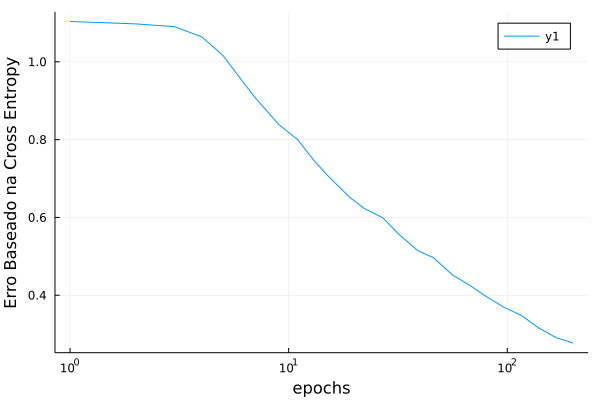

In [41]:
using Plots
plot(curva_aprendizado.parameter_values,
     curva_aprendizado.measurements,
     xlab = curva_aprendizado.parameter_name,
     xscale = curva_aprendizado.parameter_scale,
     ylab = "Erro Baseado na Cross Entropy")

In [42]:
# Salva o modelo em disco
MLJ.save("modelo/modelo_rede_neural.jlso", mach)

In [43]:
# Carrega o modelo do disco
mach2 = machine("modelo/modelo_rede_neural.jlso")

Machine{NeuralNetworkClassifier{Short,…},…} trained 1 time; caches data
  model: MLJFlux.NeuralNetworkClassifier{MLJFlux.Short, typeof(NNlib.softmax), Flux.Optimise.ADAM, typeof(Flux.Losses.crossentropy)}
  args: 


In [44]:
# Faz previsões com dados de teste
yhat = predict(mach2, X[test,:])

45-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.171, Iris-versicolor=>0.463, Iris-virginica=>0.367)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.124, Iris-versicolor=>0.438, Iris-virginica=>0.438)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.95, Iris-versicolor=>0.048, Iris-virginica=>0.00202)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.108, Iris-versicolor=>0.421, Iris-virginica=>0.471)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.104, Iris-versicolor=>0.419, Iris-virginica=>0.477)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.921, Iris-versicolor=>0.0756, Iris-virginica=>0.00381)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.14, Iris-versicolor=>0.444, Iris-virginica=>0.417)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.154, Iris-versicolor=>0.45, Iris-virginica=>0.395)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.117, Iris-versicolor=>0.425, Iris-virginica=>0.457

In [45]:
# Visualiza algumas previsões
yhat[1:5]

5-element CategoricalDistributions.UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.171, Iris-versicolor=>0.463, Iris-virginica=>0.367)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.124, Iris-versicolor=>0.438, Iris-virginica=>0.438)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.95, Iris-versicolor=>0.048, Iris-virginica=>0.00202)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.108, Iris-versicolor=>0.421, Iris-virginica=>0.471)
 UnivariateFinite{Multiclass{3}}(Iris-setosa=>0.104, Iris-versicolor=>0.419, Iris-virginica=>0.477)

In [46]:
# Para obter a probabilidade de "Iris-virginica" na primeira previsão
pdf(yhat[1], "Iris-virginica")

0.36655384234080374

In [47]:
# Obtém as previsões de cada linha com as probabilidades para cada uma das 3 classes
L = levels(y)
pdf(yhat, L)

45×3 Matrix{Float64}:
 0.170753  0.462693   0.366554
 0.124039  0.437699   0.438262
 0.949999  0.0479837  0.0020171
 0.108175  0.421245   0.47058
 0.104094  0.418536   0.47737
 0.920545  0.0756485  0.003806
 0.139528  0.44396    0.416512
 0.154455  0.45017    0.395374
 0.117336  0.425422   0.457241
 0.189829  0.467817   0.342353
 0.116904  0.43096    0.452136
 0.148718  0.452264   0.399018
 0.123777  0.435899   0.440325
 ⋮                    
 0.12117   0.434135   0.444694
 0.952847  0.0453568  0.00179613
 0.110803  0.424728   0.464469
 0.105723  0.420296   0.473981
 0.110471  0.425676   0.463853
 0.186123  0.474817   0.33906
 0.10823   0.421482   0.470289
 0.959656  0.0389554  0.00138848
 0.104888  0.419022   0.47609
 0.111784  0.426243   0.461974
 0.964141  0.034645   0.00121363
 0.964246  0.0345598  0.00119389

# Fim